In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)


# Load the Data


In [262]:
d1= pd.read_csv(r"C:\Users\Admin\Desktop\PJ\Manju\0654d015-d4b4-4357-8040-6a846dec093d_training_set_track_features_mini\data\training_set\log_mini.csv")

In [86]:
d1.head(5)

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


# Print all Columns

In [164]:
pd.options.display.max_columns = None

In [263]:
d1.head(5)

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


# Print Shape of the Data

In [264]:
d1.shape

(167880, 21)

# Descriptive statistics summary

In [265]:
d1.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000


# Identify the Data Types

In [266]:
d1.dtypes
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   skip_1                           167880 non-null  bool  
 5   skip_2                           167880 non-null  bool  
 6   skip_3                           167880 non-null  bool  
 7   not_skipped                      167880 non-null  bool  
 8   context_switch                   167880 non-null  int64 
 9   no_pause_before_play             167880 non-null  int64 
 10  short_pause_before_play          167880 non-null  int64 
 11  long_pause_before_play           167880 non-null  int64 
 12  hist_user_behavi

# Label encoder for Categorical and Boolean 

In [267]:

le = LabelEncoder()


d1[d1.select_dtypes(include=['bool']).columns] = d1[d1.select_dtypes(include=['bool']).columns].apply(le.fit_transform)

In [268]:
d1.hist_user_behavior_reason_start=le.fit_transform(d1.hist_user_behavior_reason_start)
d1.hist_user_behavior_reason_end=le.fit_transform(d1.hist_user_behavior_reason_end)
d1.context_type=le.fit_transform(d1.context_type)

# Converting dates to object

In [269]:
d1['date']= d1['date'].astype(object, copy=False)

In [270]:
d1.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id_clean                     object
skip_1                              int64
skip_2                              int64
skip_3                              int64
not_skipped                         int64
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle       int64
hour_of_day                         int64
date                               object
premium                             int64
context_type                        int32
hist_user_behavior_reason_start     int32
hist_user_behavior_reason_end       int32
dtype: object

# Correlation Check

In [271]:
correlation_d1 = d1.corr()
correlation_d1

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
session_position,1.000000,0.313508,0.055365,0.040010,0.001222,0.005463,-0.020918,0.194384,0.027115,0.023199,-0.035673,-0.023678,0.012484,-0.004032,0.023865,0.025774,0.053995,0.014462
session_length,0.313508,1.000000,0.090904,0.078193,0.060131,-0.059734,-0.012779,0.053717,-0.007410,-0.020236,-0.008572,-0.016171,0.032005,-0.013001,0.075817,0.042084,-0.013238,-0.043479
skip_1,0.055365,0.090904,1.000000,0.824751,0.628597,-0.602966,-0.094305,0.191440,-0.129213,-0.163313,-0.043591,-0.051059,0.052393,0.011958,-0.027076,0.097732,-0.373275,-0.567035
skip_2,0.040010,0.078193,0.824751,1.000000,0.762141,-0.731088,-0.073632,0.105180,-0.033340,-0.073393,0.003953,-0.036935,0.048836,0.009774,-0.016049,0.069927,-0.354436,-0.679999
skip_3,0.001222,0.060131,0.628597,0.762141,1.000000,-0.959225,-0.042541,-0.064818,0.117503,0.081010,0.047476,-0.021808,0.033876,0.013727,-0.004615,0.045865,-0.321073,-0.857099
not_skipped,0.005463,-0.059734,-0.602966,-0.731088,-0.959225,1.000000,0.035617,0.080246,-0.126978,-0.092755,-0.052323,0.021128,-0.030787,-0.014643,0.002696,-0.046635,0.326417,0.865185
context_switch,-0.020918,-0.012779,-0.094305,-0.073632,-0.042541,0.035617,1.000000,0.003908,0.009697,0.028170,0.025040,0.013602,-0.045769,-0.002287,0.023390,-0.106671,-0.254600,0.026736
no_pause_before_play,0.194384,0.053717,0.191440,0.105180,-0.064818,0.080246,0.003908,1.000000,-0.753359,-0.830743,-0.060936,-0.053761,-0.017914,-0.013401,0.010235,0.018233,-0.160297,0.059991
short_pause_before_play,0.027115,-0.007410,-0.129213,-0.033340,0.117503,-0.126978,0.009697,-0.753359,1.000000,0.906850,0.003859,0.024104,0.030871,0.014678,0.027277,-0.008989,0.250481,-0.105087
long_pause_before_play,0.023199,-0.020236,-0.163313,-0.073393,0.081010,-0.092755,0.028170,-0.830743,0.906850,1.000000,0.009653,0.034565,0.022136,0.014715,-0.008371,-0.012952,0.246723,-0.075718


# Load Track features data

In [272]:
d2 = pd.read_csv(r"C:\Users\Admin\Desktop\PJ\Manju\0654d015-d4b4-4357-8040-6a846dec093d_training_set_track_features_mini\data\track_features\tf_mini.csv")

In [273]:
d2.head(5)

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,0.976866,2.541884e-10,0,0.189162,-6.836,0.281250,major,0.723808,0.032043,95.261002,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


#  Descriptive statistics summary

In [274]:
d2.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,5.070400e+04,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000
mean,222.267980,2010.324748,99.455131,0.250336,0.492075,0.514526,0.611742,8.215950,0.641440,0.996548,7.058671e-02,5.269111,0.205520,-7.519316,0.547603,0.391874,0.122998,121.576396,3.913163,0.487804,-0.332295,0.202193,0.153935,-0.040526,-0.027247,0.049475,-0.197758,0.005153
std,72.224839,11.471866,1.139222,0.276047,0.158102,0.182595,0.166146,2.410626,0.207957,0.045611,2.142261e-01,3.597578,0.176486,3.927858,0.223803,0.207116,0.136022,29.786741,0.410036,0.246376,0.416320,0.254024,0.212660,0.333129,0.377457,0.144205,0.349840,0.324259
min,30.013330,1950.000000,90.018900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,183.933334,2009.000000,99.509670,0.025291,0.374378,0.372463,0.502499,6.356671,0.507839,0.975910,1.084167e-08,2.000000,0.098249,-8.942000,0.366652,0.225742,0.038028,97.158997,4.000000,0.292559,-0.745148,0.086460,0.051604,-0.294574,-0.318751,-0.038337,-0.444849,-0.176821
50%,214.866669,2015.000000,99.865444,0.135821,0.493764,0.522266,0.625145,8.015075,0.661368,1.003790,2.211650e-06,5.000000,0.131403,-6.688000,0.571023,0.364057,0.061794,120.115498,4.000000,0.478244,-0.334799,0.265535,0.207705,-0.001755,-0.176974,0.062719,-0.298599,0.090423
75%,250.426666,2017.000000,99.961131,0.406142,0.604994,0.655912,0.736241,9.792092,0.803185,1.026137,7.654784e-04,8.000000,0.262823,-5.043000,0.729537,0.533131,0.160202,141.014008,4.000000,0.677947,0.045921,0.359553,0.296132,0.146828,0.280852,0.160366,-0.075158,0.194285
max,1787.760986,2018.000000,99.999997,0.995796,0.990419,0.972590,0.984952,32.342781,0.999877,1.103213,9.993988e-01,11.000000,0.996257,1.634000,1.000000,0.962350,0.961408,218.774994,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213


In [275]:
d2.dtypes

track_id                   object
duration                  float64
release_year                int64
us_popularity_estimate    float64
acousticness              float64
beat_strength             float64
bounciness                float64
danceability              float64
dyn_range_mean            float64
energy                    float64
flatness                  float64
instrumentalness          float64
key                         int64
liveness                  float64
loudness                  float64
mechanism                 float64
mode                       object
organism                  float64
speechiness               float64
tempo                     float64
time_signature              int64
valence                   float64
acoustic_vector_0         float64
acoustic_vector_1         float64
acoustic_vector_2         float64
acoustic_vector_3         float64
acoustic_vector_4         float64
acoustic_vector_5         float64
acoustic_vector_6         float64
acoustic_vecto

# Merge Session Data and Track Features

In [276]:
d3 = d1.merge(d2, left_on = 'track_id_clean', right_on = 'track_id')
d3.head(5)
d3.shape

(167880, 51)

# Drop common columns

In [277]:
d3 = d3.drop('track_id_clean', axis = 1)
d3.shape

(167880, 50)

In [278]:
d3[d3.select_dtypes(include=['object']).columns] = d3[d3.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [279]:
d3.dtypes

session_id                           int32
session_position                     int64
session_length                       int64
skip_1                               int64
skip_2                               int64
skip_3                               int64
not_skipped                          int64
context_switch                       int64
no_pause_before_play                 int64
short_pause_before_play              int64
long_pause_before_play               int64
hist_user_behavior_n_seekfwd         int64
hist_user_behavior_n_seekback        int64
hist_user_behavior_is_shuffle        int64
hour_of_day                          int64
date                                 int32
premium                              int64
context_type                         int32
hist_user_behavior_reason_start      int32
hist_user_behavior_reason_end        int32
track_id                             int32
duration                           float64
release_year                         int64
us_populari

# Removing Outliers

In [280]:
Q1 = d3.quantile(0.25)
Q3 = d3.quantile(0.75)
IQR = Q3-Q1
print(IQR)

session_id                          5001.000000
session_position                       9.000000
session_length                         5.000000
skip_1                                 1.000000
skip_2                                 1.000000
skip_3                                 1.000000
not_skipped                            1.000000
context_switch                         0.000000
no_pause_before_play                   0.000000
short_pause_before_play                0.000000
long_pause_before_play                 0.000000
hist_user_behavior_n_seekfwd           0.000000
hist_user_behavior_n_seekback          0.000000
hist_user_behavior_is_shuffle          1.000000
hour_of_day                            8.000000
date                                   1.000000
premium                                0.000000
context_type                           3.000000
hist_user_behavior_reason_start        3.000000
hist_user_behavior_reason_end          3.000000
track_id                           24235

In [281]:
d3.shape

(167880, 50)

# Correlation check for the final data

In [282]:
correlation_d3 = d3.corr()
correlation_d3

correlation_d3.head(15)

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
session_id,1.000000,-0.000622,-0.001983,-0.001070,-0.002515,-0.002488,0.003073,-0.001096,-0.003977,0.003762,0.004390,0.001134,0.000091,0.000842,0.001473,0.003870,-0.006653,-0.008997,0.004451,0.002708,0.003739,-0.001718,-0.013094,-0.009693,0.010716,-0.015723,-0.015565,-0.013853,-0.014620,-0.006425,0.001658,0.008902,0.001990,0.001823,-0.011690,-0.006384,-0.002801,0.010452,-0.010483,0.001987,-0.003155,-0.003513,0.021138,-0.013031,-0.000108,-0.007042,0.008748,0.006820,0.014305,-0.015403
session_position,-0.000622,1.000000,0.313508,0.055365,0.040010,0.001222,0.005463,-0.020918,0.194384,0.027115,0.023199,-0.035673,-0.023678,0.012484,-0.004032,-0.005169,0.023865,0.025774,0.053995,0.014462,-0.001826,-0.004804,0.000361,-0.004715,-0.000785,-0.001171,-0.000398,0.000282,-0.002668,-0.000711,-0.001986,0.003824,0.003461,0.002167,-0.002581,-0.002795,0.013140,0.000002,0.008056,0.002231,-0.003851,0.007374,-0.008291,0.001391,0.002641,0.007888,-0.002797,-0.008197,-0.001811,0.003820
session_length,-0.001983,0.313508,1.000000,0.090904,0.078193,0.060131,-0.059734,-0.012779,0.053717,-0.007410,-0.020236,-0.008572,-0.016171,0.032005,-0.013001,-0.038834,0.075817,0.042084,-0.013238,-0.043479,-0.000198,-0.010037,0.010267,0.003600,-0.002614,0.011249,0.013911,0.012469,0.011267,-0.008518,0.011915,-0.002057,0.004523,-0.000597,-0.005544,0.000219,0.008620,-0.002238,0.014414,0.005955,0.000052,-0.003812,-0.026988,0.001407,0.007729,0.022729,-0.009516,-0.022487,-0.015920,0.007080
skip_1,-0.001070,0.055365,0.090904,1.000000,0.824751,0.628597,-0.602966,-0.094305,0.191440,-0.129213,-0.163313,-0.043591,-0.051059,0.052393,0.011958,-0.008109,-0.027076,0.097732,-0.373275,-0.567035,-0.002327,0.017686,-0.001480,0.005001,-0.021315,0.006606,0.011013,0.009693,0.010775,0.004704,0.002431,-0.017852,0.003254,0.002677,0.009349,-0.001300,0.011358,-0.010563,0.021412,0.005366,0.009910,-0.005272,-0.034232,0.017919,0.013202,0.011871,-0.020942,-0.014580,-0.029346,0.013716
skip_2,-0.002515,0.040010,0.078193,0.824751,1.000000,0.762141,-0.731088,-0.073632,0.105180,-0.033340,-0.073393,0.003953,-0.036935,0.048836,0.009774,-0.003778,-0.016049,0.069927,-0.354436,-0.679999,-0.000285,0.019314,-0.007481,-0.004016,-0.018282,0.001073,0.006000,0.004638,0.007270,0.006438,-0.001484,-0.012767,0.002002,0.004030,0.006790,-0.005497,0.011581,-0.005904,0.019807,0.005414,0.007547,-0.000653,-0.025665,0.011355,0.011561,0.013393,-0.015201,-0.015895,-0.017240,0.009701
skip_3,-0.002488,0.001222,0.060131,0.628597,0.762141,1.000000,-0.959225,-0.042541,-0.064818,0.117503,0.081010,0.047476,-0.021808,0.033876,0.013727,0.000717,-0.004615,0.045865,-0.321073,-0.857099,-0.000225,0.067098,-0.006304,-0.007667,-0.029452,0.006386,0.011454,0.006659,0.012575,0.010591,0.004289,-0.014092,-0.001179,0.011897,0.011323,-0.006248,0.009813,-0.011545,0.023402,0.005896,0.009200,-0.011939,-0.036253,0.014093,0.012855,0.018123,-0.024278,-0.018474,-0.023620,0.022306
not_skipped,0.003073,0.005463,-0.059734,-0.602966,-0.731088,-0.959225,1.000000,0.035617,0.080246,-0.126978,-0.092755,-0.052323,0.021128,-0.030787,-0.014643,-0.000140,0.002696,-0.046635,0.326417,0.865185,-0.000835,-0.061463,0.018163,0.009868,0.029189,-0.010545,-0.014912,-0.009379,-0.015085,-0.008963,-0.006435,0.014725,0.000954,-0.011041,-0.008438,0.005458,-0.0068

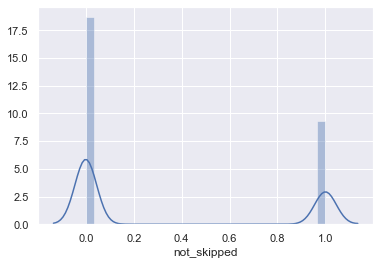

In [283]:
sns.distplot(d3['not_skipped']);

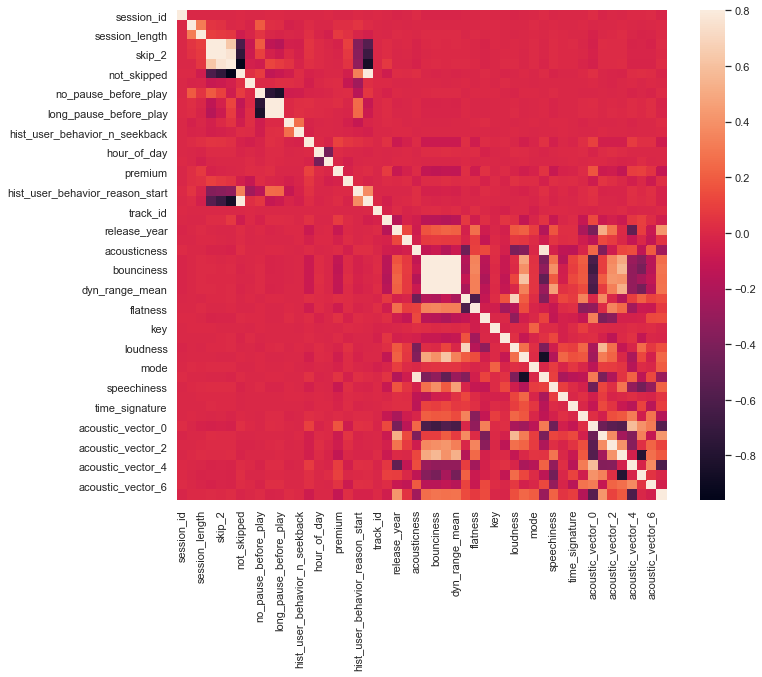

In [284]:
corrmat = d3.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [285]:
d3.columns

Index(['session_id', 'session_position', 'session_length', 'skip_1', 'skip_2',
       'skip_3', 'not_skipped', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'date', 'premium',
       'context_type', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end', 'track_id', 'duration', 'release_year',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mechanism', 'mode',
       'organism', 'speechiness', 'tempo', 'time_signature', 'valence',
       'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2',
       'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5',
       'acoustic_vector_6', 'acoustic_vector_7'],
      dtype='object

# Check for any missing data

In [286]:
#missing data
total = d3.isnull().sum().sort_values(ascending=False)
percent = (d3.isnull().sum()/d3.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
acoustic_vector_7,0,0.0
hist_user_behavior_n_seekback,0,0.0
release_year,0,0.0
duration,0,0.0
track_id,0,0.0
hist_user_behavior_reason_end,0,0.0
hist_user_behavior_reason_start,0,0.0
context_type,0,0.0
premium,0,0.0
date,0,0.0


In [360]:
d3 = d3[~((d3 < (Q1-1.5 * IQR)) |(d3 > (Q3 + 1.5 * IQR))).any(axis=1)]
d3.shape

(38818, 50)

In [288]:
#d4 =d3.drop(['context_switch', 'short_pause_before_play', 'long_pause_before_play', 'time_signature', 'key'], axis = 1) 

In [335]:
#d4.shape

# Push the target variable to last column

In [361]:
d3= d3[[c for c in d3 if c not in ['not_skipped']] 
       + ['not_skipped']]

In [362]:
d3.shape

(38818, 50)

# Split Test, Train

In [363]:
x = d3.iloc[:, 0:49]
y= d3.iloc[:,-1]

In [364]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)


# Scaling of the final data

In [366]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Random Forest Modelling

In [367]:
import random 
train, test, validation = test_train_validation(d4)


In [368]:
from sklearn.ensemble import RandomForestClassifier

my_model = RandomForestClassifier(n_estimators=1, max_depth = 20).fit(X_train, y_train)

# Get the Accuracy

In [369]:
pred=my_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.9945904173106646
